## Introduction to vector graphics with Luxor.jl

This course is a short introduction to making vector graphics. By the end of this course you will have learnt quite a bit about how to use Luxor to make vector graphics, and started making some cool images.

Luxor.jl is a simple package designed to make *vector graphics*, which are pictures made out of colored lines and curves, plus any text. Luxor produces PNG, SVG, and PDF files; PDF and SVG are resolution-independent formats, so you can scale them up or down as much as you like without losing detail. PNG files are, like photos and JPEG images, made at a specific resolution.

Luxor sits in the space between the heavy-duty Julia plotting packages such as Plots.jl, Gadfly, and Pyplot (among others), and applications such as Inkscape and Adobe Illustrator. Like Plots.jl et al, you specify what you want to draw with Julia functions and parameters using code, rather than by clicking and pointing at the screen with a mouse or trackpad. Like Inkscape/Illustrator, you have the task of specifying every shape and color you want in your final drawing, rather than having the software do everything for you.

If you've learnt a bit about Julia already, and if you can remember some of the geometry you learned at school (angles, coordinates, and so on), you know enough to get started. To install Luxor, use the Julia package manager and type `] add Luxor`.)

# Chapter 1: The first task: design a logo

The new (and currently fictitious) organization JuliaFission has just asked you to design a new logo for them. They're something to do with atoms and particles, perhaps? So we'll design a new logo for them using some basic shapes; perhaps colored circles in some kind of spiral formation would look suitably "atomic". Let's try out some ideas.

### A first drawing

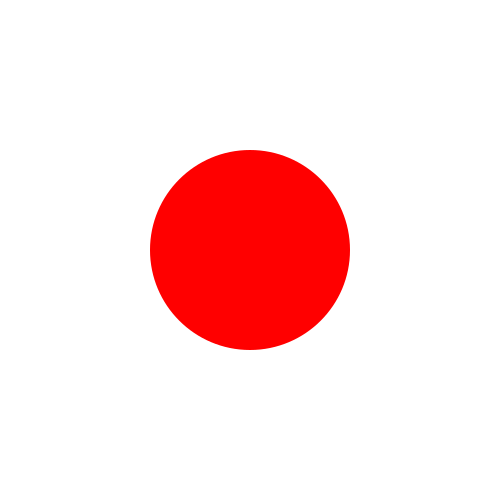

In [1]:
using Luxor

Drawing(500, 500, "my-drawing.png")
origin()
setcolor("red")
circle(Point(0, 0), 100, :fill)
finish()
preview()

is short piece of code does the following things:

- Makes a new drawing 500 units square, and saves it in "my-drawing.png" in PNG format.

- Moves the zero point from the top left to the center. Graphics applications often start measuring from the top left (or bottom left), but it's easier to work out the positions of things if you start at the center.)

- Selects one of the 200 or so named colors (defined [here](http://juliagraphics.github.io/Colors.jl/stable/))

- Draws a circle at x = 0, y = 0, with radius 100 units, and fills it with the current color.)

- Finishes the drawing and displays it on the screen.

In case you're wondering, the units are *points* (as in font sizes), and there are 72 points in an inch, just over 3 per millimeter. The y-axis points down the page, by the way. If you want to be reminded of where the x and y axes are, uses the `rulers()` function.

The `:fill` at the end of `circle()` is one of a set of symbols that lets you display the shape in different ways. There's also `:stroke`, which draws around the edges but doesn't fill the shape with color. You might also meet `:path`, `fillpreserve`, `strokepreserve`, `clip`, and `:none`.

### Circles in a spiral

We want more than just one circle. We'll define a rectangular shape, and place circles at each corner. The `ngon()` function creates regular polygon (eg triangles, squares, etc.), and the `vertices=true` keyword returns the corner points - just what we want.

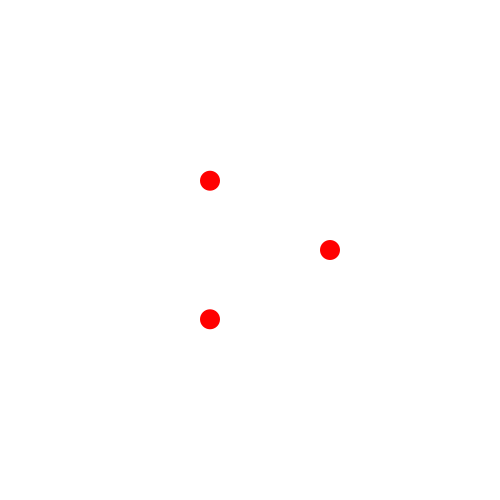

In [2]:
Drawing(500, 500, "my-drawing.png")
origin()
setcolor("red")
corners = ngon(Point(0, 0), 80, 3, vertices=true)
circle.(corners, 10, :fill)
finish()
preview()

Notice the "." after `circle`. This broadcasts the `circle()` function over the `corners`, drawing a red filled circle at every point.

The arguments to `ngon` are centerpoint, radius, and number of sides. Try changing the third argument from 4 to 3 or 33.

To create a spiral of circles, we want to repeat this `ngon`...`circle` part more than once. A simple loop will do: we'll rotate everything by `i` * 5° (`deg2rad(5)` radians) each time (so 5°, 10°, 15°, 20°, 25°, and 30°), and increase the size of the ngon by multiples of 10:

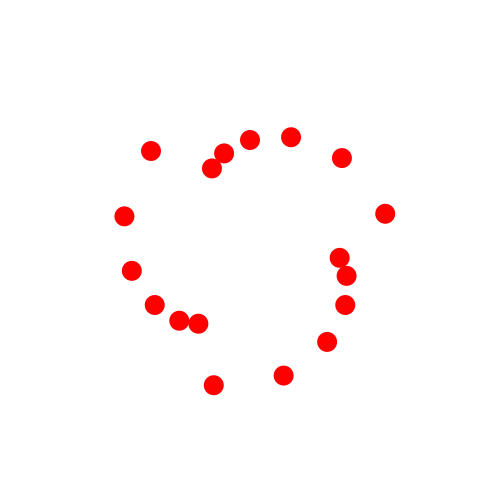

In [3]:
Drawing(500, 500, "my-drawing.png")
origin()
setcolor("red")
for i in 1:6
    rotate(i * deg2rad(5))
    corners = ngon(Point(0, 0), 80 + 10i, 3, vertices=true)
    circle.(corners, 10, :fill)
end
finish()
preview()

### Just add color

The Julia colors are available as constants in Luxor, so we can make two changes that cycle through them. The first line creates the set of colors; the `setcolor()` function then works through them. `mod1()` is the 1-based `mod` function, essential for Julia with the 1-based indexing.

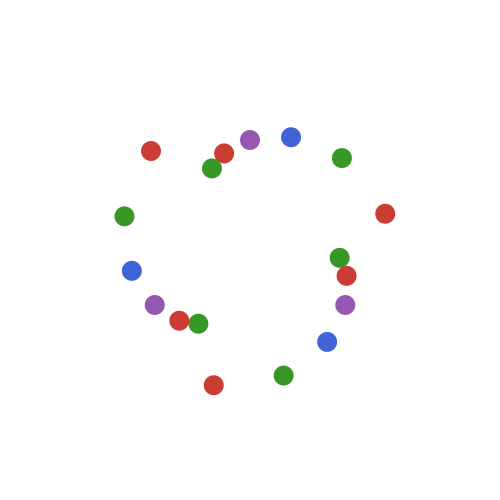

In [4]:
const colors = (Luxor.julia_green, Luxor.julia_red,Luxor.julia_purple, Luxor.julia_blue) ### <-
Drawing(500, 500, "my-drawing.png")
origin()
for i in 1:6
    setcolor(colors[mod1(i, end)]) ### <-
    rotate(i * deg2rad(5))
    corners = ngon(Point(0, 0), 80 + 10i, 3, vertices=true)
    circle.(corners, 10, :fill)
end
finish()
preview()

## Taking particles seriously

The flat circles are a bit dull, so let's write a function that takes circles seriously. The `drawcircle()` function draws loads of circles, but each one is drawn with a slightly smaller radius and a slightly lighter shade of the incoming color. The `rescale()` function in Luxor provides an easy way to map or adjust values from one range to another; here, numbers between 5 and 1 are mapped to numbers between 0.5 and 3. And the radius is scaled to run between `radius` and `radius/6`. Also, let's make them get larger as they spiral outwards, by adding `4i` to the radius when called by `drawcircle()`.

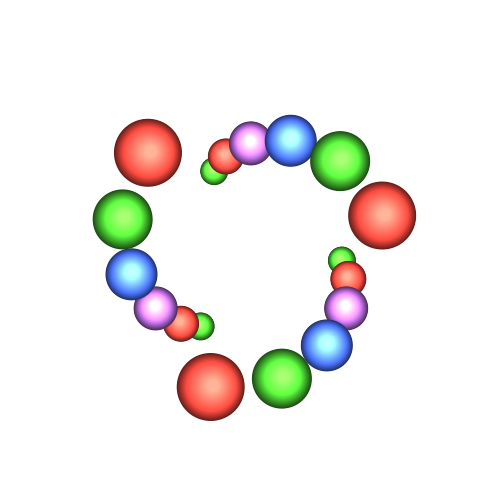

In [5]:
function drawcircle(pos, radius, n) ## <-
    c = colors[mod1(n, end)]
    for i in 5:-0.1:1
        setcolor(rescale(i, 5, 1, 0.5, 3) .* c)
        circle(pos + (i/2, i/2), rescale(i, 5, 1, radius, radius/6), :fill)
    end
end

Drawing(500, 500, "my-drawing.png")
    origin()
    for i in 1:6
        rotate(i * deg2rad(5))
        corners = ngon(Point(0, 0), 80 + 10i, 3, vertices=true)
        drawcircle.(corners, 10 + 4i, i) ## <-
    end
    finish()
    preview()

This is looking quite promising. But here's the thing: in a parallel universe, you might already have made this in no time at all using Adobe Illustrator or Inkscape. But with this Luxor code, you can try all kinds of different variations with almost immediate results - just walk through the parameter space, either manually or via code, and see what effects you get. You don't have to redraw everything with different angles and radii...

So here's what a pentagonal theme with more circles looks like:

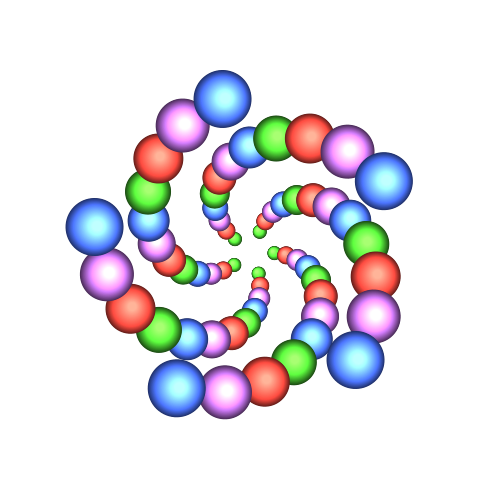

In [6]:
Drawing(500, 500, "my-drawing.png")
origin()
for i in 1:12
    rotate(i * deg2rad(1.5))
    corners = ngon(Point(0, 0), 10 + 12i, 5, vertices=true)
    drawcircle.(corners, 5 + 2i, i)
end
finish()
preview()

To tidy up, it's a good idea to move the code into functions, and do a bit of housekeeping. The final script looks like this:

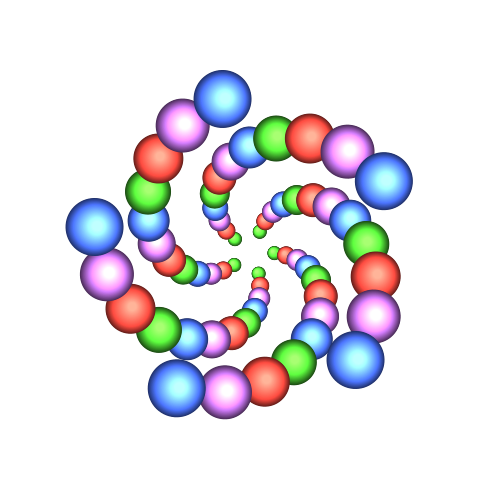

In [7]:
using Luxor

const colors = (Luxor.julia_green, Luxor.julia_red,Luxor.julia_purple, Luxor.julia_blue)

function drawcircle(pos, radius, n)
    c = colors[mod1(n, end)]
    for i in 5:-.1:1
        setcolor(rescale(i, 5, 1, 0.5, 3) .* c)
        circle(pos + (i/2, i/2), rescale(i, 5, 1, radius, radius/6), :fill)
    end
end

function main(filename)
    Drawing(500, 500, filename)
    origin()
    for i in 1:12
        rotate(i * deg2rad(1.5))
        corners = ngon(Point(0, 0), 10 + 12i, 5, vertices=true)
        drawcircle.(corners, 5 + 2i, i)
    end
    finish()
    preview()
end

main("my-drawing.svg")

To create a high-quality resolution-independent SVG, just change the suffix from ".png" to ".svg"

So, did the JuliaFission organization like their logo? Who knows!? But if not, we can recycle some of these ideas for future projects.

### Challenges

Before you move on to the next chapter, perhaps you'd like to take an extra challenge or two?

#### 1. Remember the random values

Using random numbers is a great way to find new patterns and shapes; but unless you know what the values are, you can't reproduce them. So modify the code so that the random numbers are remembered, and drawn on the screen (you can use the `text(str, position)` function),

#### 2. Backgrounds

Because there's no background, the SVG or PNG image created will have a transparent background. This is usually what you want for an icon or logo. But this design might look good against a darker colored background. Use `background()` or `paint()` and experiment.

#### 3. Randomize

Try refactoring your code so that you can automatically run through various parameter ranges.

# Chapter 2: Interactive geometry

Circles, lines, arcs, and polygons are the fundamental particles of Luxor. One way to explore some of the features is to use the interactive abilities of a Jupyter notebook.

You'll need to add the Interact.jl package if you haven't already done so:

using Pkg

Pkg.add("Interact")

In [8]:
import Interact: @manipulate

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3307563909327897967\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5664985490669303811\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3307563909327897967\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Interact.jl has a `@manipulate()` macro that provides a slider. This feeds a changing numeric value into the Luxor code that's generating the image. Because we don't want to generate thousands of images for the slider positions, we'll use the in-memory (file-less) version of the `Drawing()` function, assign it to `d`, and return `d` as the result. (You must run this in Jupyter, not Atom/Juno or VS Code.)

In [9]:
@manipulate for r1 in 80:200, r2 in 80:200
d = Drawing(500, 500, :svg)
origin()
sethue("black")
circle(Point(-100, 0), r1, :stroke)
circle(Point(100, 0), r2, :stroke)
flag, ip1, ip2 = intersectioncirclecircle(Point(-100, 0), r1, Point(100, 0), r2)

if flag
    sethue("red")
    circle(ip1, 12, :fill)
    sethue("green")
    circle(ip2, 10, :fill)
end
finish()
return d
end

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r1"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 200,:min => 80,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
140, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000114316890, Task (runnable) @0x0000000114316890), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"80\",\"81\",\"82\",\"83\",\"84\",\"85\",\"86\",\"87\",\"88\",\"89\",\"90\",\"91\",\"92\",\"93\",\"94\",\"95\",\"96\",\"97\",\"98\",\"99\",\"100\"

The mathematics going on behind the scenes here avoids the situation when there is a single intersection point, probably because it would demand too much accuracy from the floating-point routines involved. Simple graphics aren't perfectly accurate!

## Sample size

Now let's investigate the `polysample()` function, a useful tool that creates new versions of polygons by "sampling" them a given number of times. First we create a regular polygon, using `ngonside()` rather than `ngon()`, with `nsides` sides and sidelength of 100. Then we sample the polygon `s` times. Finally, we use the `prettypoly()` function to apply a stroke to the sampled polygon. It's called `prettypoly()` because it automatically highlights the vertices for you with small circles - very useful when you're working with unfamiliar polygons.

In [10]:
@manipulate for s in 3:100, nsides=3:12
    d = Drawing(500, 500, :svg)
    origin()
    sethue("black")
    pgon = ngonside(Point(0, 0), 100, nsides, vertices=true)
    psampled = polysample(pgon, s)
    prettypoly(psampled, :stroke, close=true)

    # show perimeters
    text(string(polyperimeter(psampled)), halign=:center)
    text(string(polyperimeter(pgon)), Point(0, 40), halign=:center)

    finish()
    return d
end

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 3,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011323db10, Task (runnable) @0x000000011323db10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"2

We've also introduced the `text(str, pt)` function, that draws a string of text at a point.

Notice that at low sampling rates (low `s` values) the shape is rendered approximately rather than accurately.

## Pretty poly

With a few changes we can see some more of `prettypoly()` in action. Let's get rid of the sampling, and just vary the size of the polygons drawn at the vertices of the original `pgon`. We pass an anonymous function that draws any graphics at each vertex in turn. Here, we select a color at random, then draw another polygon centered at the vertex. The letter `O` is a short-cut for `Point(0, 0)`.

In [11]:
@manipulate for nsides in 3:12, sidelength in 40:80
    d = Drawing(500, 500, :svg)
    origin()
    setopacity(0.6)
    sethue("black")
    pgon = ngonside(Point(0, 0), sidelength, nsides, 0, vertices=true)
    prettypoly(pgon, :none, close=true, () ->
        begin
            randomhue()
            ngon(O, sidelength, nsides, 0, :fillpreserve)
            sethue("black")
            strokepath()
        end)
    finish()
    d
end

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["nsides"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 12,:min => 3,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
7, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011681aad0, Task (runnable) @0x000000011681aad0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"3144833837704917409\",\"

## Specifying locations

It's useful to be able to refer to specific points on a drawing. To help you do this, there are functions such as `midpoint()`, `between()`, among many others. There are also functions for working with bounding boxes, rectangular areas defined by two opposite corners.

`BoundingBox()` is a constructor returns the bounding box of various things, such as, in this case, the drawing. Multiplying by `k` reduces its size.

The `between()` function takes two points and a number between 0.0 and 1.0, and finds the point at that interval between them. Here it's broadcasting over a range, and finding 11 points between 0.0 and 1.0, ready for `circle()` to use.

In [12]:
@manipulate for k in 0:0.1:1.0
    d = Drawing(500, 500, :png)
    origin()

    bbox = BoundingBox() * k
    box(bbox, :stroke) ## quick way to draw around a bounding box

    circle.(between.(bbox..., 0:0.1:1.0), 5, :stroke)

    # specify the top left corner of the bounding box
    sethue("red")
    circle(boxtopleft(bbox), 10, :fill)
    finish()
    return d
end

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Users/pete/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Users/pete/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011323cfd0, Task (runnable) @0x000000011323cfd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"143518

A bounding box provides nine useful 'named' positioning functions: `boxtopleft()`, `boxmiddleright()`, and so on.

### Challenges

#### 1. More exploring

Other interesting Luxor functions to explore might be `rule()`, which can be told to keep the lines inside a bounding box, `pointinverse()`, `intersectionlinecircle()`, and `intersectboundingboxes()`, to name a few.

# Chapter 3: Conference badges; placing text

Remember when people used to attend conferences in person, and they'd wear badges to help identify themselves to others? Some day soon, perhaps, we'll be doing it again. Until then, we can work on a useful application for Luxor that will generate these badges automatically. Given a DataFrame containing the details of attendees, Luxor can process the rows and create a unique badge for each person.

If you want to follow along, install DataFrames.jl, and download the free [Barlow Condensed](https://fonts.google.com/specimen/Barlow+Condensed) font from Google Fonts, because we want a strong but narrow font for the confined space of a badge.

In [13]:
using DataFrames, Colors

Let's quickly define a few arbitrary attendees (any resemblance to real individuals or companies is unintended):

In [14]:
attendees = DataFrame(
    FirstName      =   ["Alice", "Bob", "Chuck", "Damian", "Elizabeth", "Jacquelinetta", "Gus"],
    LastName       =   ["Blackwood", "Greybeard", "Whitehat", "Gryffindor", "van Purple", "Magickata", "McTurquoisepherson" ],
    Organization   =   ["Avocado Corp",
                        "Sirius Cybernetics Corporation",
                        "Institute of Conference Badge Designers",
                        "Umbrella Corporation",
                        "Abstergo Industries",
                        "Cyberdyne Systems",
                        "Acme Industries"],
    URL            =   ["www.avocadocorp.com"
                         "www.siriuscyberneticscorporation.com"
                         "www.instituteofconferencebadgedesigners.com"
                         "www.umbrellacorporation.com"
                         "www.abstergoindustries.com"
                         "www.cyberdynesystemscorporation.com"
                         "www.acme.com"])

,FirstName,LastName,Organization,URL
,String,String,String,String
1,Alice,Blackwood,Avocado Corp,www.avocadocorp.com
2,Bob,Greybeard,Sirius Cybernetics Corporation,www.siriuscyberneticscorporation.com
3,Chuck,Whitehat,Institute of Conference Badge Designers,www.instituteofconferencebadgedesigners.com
4,Damian,Gryffindor,Umbrella Corporation,www.umbrellacorporation.com
5,Elizabeth,van Purple,Abstergo Industries,www.abstergoindustries.com
6,Jacquelinetta,Magickata,Cyberdyne Systems,www.cyberdynesystemscorporation.com
7,Gus,McTurquoisepherson,Acme Industries,www.acme.com


Some useful information:

In [15]:
const conference_name = "Dark Matters"
const conference_year = "2020"
const card_dimensions = (298, 420)

struct Attendee
    firstname:: String
    lastname:: String
    organization:: String
    url:: String
end

Luxor provides a few ways to divide up the drawing area, and two useful ones are Tilers and Tables. A Tiler constructor divides up a specified area into identical rectangular tiles; a Table constructor makes rows and columns, but each row can be a different height, and each column can be a different width. The Table constructor can accepts rows/columns, or vectors defining row and column heights. For this task, we'll define a table with 1 column, and 8 rows, and a bit of sketching and experimentation suggests the following row heights.

In [16]:
table = Table([100, 5, 90, 50, 40, 40, 5, 90], [298])

Table([100, 5, 90, 50, 40, 40, 5, 90], [298], 8, 1, 1, 1, -149.0, -210.0, Point(0.0, 0.0))

This quick test shows the basic structure:

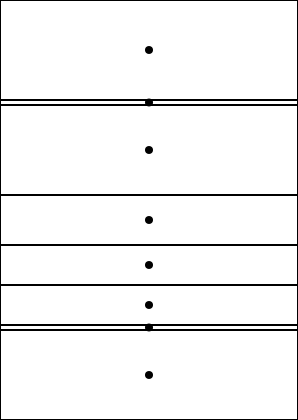

In [17]:
Drawing(card_dimensions..., "testcard.svg")
origin()
sethue("black")
for (pos, n) in table
    box(pos, table.colwidths[1], table.rowheights[n], :stroke)
    circle(pos, 4, :fill)
end
finish()
preview()

The four pieces of information for each attendee are to be placed in table rows 3, 4, 5, and 6. Let's try it out. The throwaway `test_draw_attendee()` function takes a single row of the DataFrame and draws the four pieces of text in these four table cells.

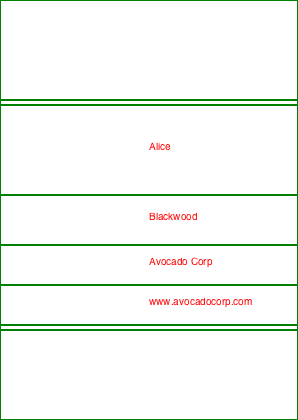

In [18]:
function test_draw_attendee(a, table)
    person = Attendee(a...)
    Drawing(card_dimensions..., "/tmp/testcard-$(person.firstname)-$(person.lastname).png")
    origin()
    sethue("green")
    for (pos, k) in table
        box(pos, table.colwidths[1], table.rowheights[k], :stroke)
    end
    sethue("red")
    text(person.firstname,    table[3])
    text(person.lastname,     table[4])
    text(person.organization, table[5])
    text(person.url,          table[6])
    finish()
    preview()
end

test_draw_attendee(attendees[1, :], table)

This looks structurally OK. But it's not very appealing visually, so the main job now is to place the text more carefully and use some color.

We'll make a custom text-drawing function. This draws the text in `str`, and tries to use the font and font size supplied to fit in a space `w` by `h`. But, if the text would be too wide, the font size is reduced until it fits. We can use the `textextents()` function for this, because it returns a useful list of all the dimensions of the text with the current settings.

In [19]:
function drawtext(str, pos, w, h;
        margin=20,
        fsize=20,
        fface="BarlowCondensed-Bold",
        fground = colorant"black",
        bground = colorant"white",
        halignment = :left)
    fontface(fface)
    fontsize(fsize)
    # check and recalculate if necessary
    textwidth = textextents(str)
    if textwidth[3] > (w - 2margin)
        fs = fsize
        while(textwidth[3] > (w - 2margin))
            fs -= 2
            fontsize(fs)
            textwidth = textextents(str)
        end
        fontsize(fs)
    end
    # paint the box
    sethue(bground)
    box(pos, w, h, :fillstroke)
    sethue(fground)
    # allow for centered text
    if halignment == :left
        text(str, pos - (w/2 - margin, 0), halign=:left, valign=:middle)
    else
        text(str, pos - (w/2 - margin, 0), valign=:middle)
    end
end

drawtext (generic function with 1 method)

Finally, this function draws a single badge:

In [20]:
function draw_attendee(a, table)
    person = Attendee(a...)
    Drawing(card_dimensions..., "/tmp/testbadge-$(person.firstname)-$(person.lastname).svg")
    origin()
    background("white")
    sethue("black")
    w = table.colwidths[1]

    @layer begin
        sethue("black")
        box(table, 1, :fill)

        # dividers
        sethue("red")
        box(table, 2, :fill)
        box(table, 7, :fill)
    end

    drawtext(person.firstname, table[3], w, table.rowheights[3],
        fsize=70, fface="BarlowCondensed-Black",
        fground = "white",
        bground = HSV(230, .8, .2))
    drawtext(person.lastname, table[4], w, table.rowheights[4],
        fsize=40, fface="BarlowCondensed-Bold",
        fground = "white",
        bground = HSV(230, .8, .2))
    drawtext(person.organization, table[5], w, table.rowheights[5],
        fsize=30, fface="BarlowCondensed-Bold",
        fground = "white",
        bground = HSV(230, .6, .5))
    drawtext(person.url, table[6], w, table.rowheights[6],
        fsize=20, fface="BarlowCondensed-Bold",
        fground = "white",
        bground = HSV(230, .5, .7))

    # what conference is this anyway?
    drawtext(uppercase(conference_name) * "∞" * conference_year, table[8], table.colwidths[1], table.rowheights[8],
        fsize=40, fface="BarlowCondensed-Black",
        fground = "black",
        bground = "darkorange",
        halignment=:center)

    # final decoration
    @layer begin
        translate(table[1])
        setopacity(0.3)
        setline(0.5)
        sethue("white")
        epitrochoid(200, 31, 250, :stroke)
        end

    finish()
    preview()
end

draw_attendee (generic function with 1 method)

Each one can be checked individually:

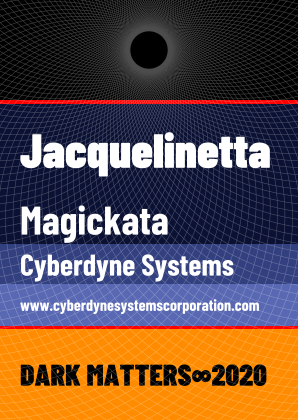

In [21]:
function testone()
    draw_attendee(attendees[6, :], table)
end

testone()

And then we can generate them all:

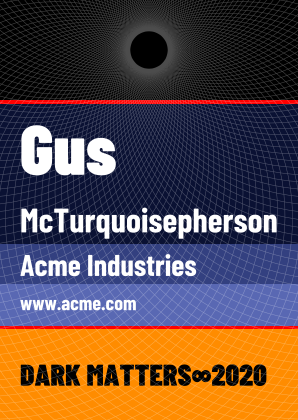

In [22]:
function testall()
    for r in eachrow(attendees)
        println("printing $(r.FirstName * " " * r.LastName)")
        draw_attendee(r, table)
    end
end

testall()

### Challenges

#### 1. Add a QR code

Adding a QR code to each badge sounds like fun. You can find a nice Julia QR code package [here](https://github.com/jiegillet/QRCode.jl). It's easy enough to generate a grid of black and white squares using Luxor's Table or Tiler objects.

# Chapter 4: Generative art

You can make art with anything - these days you might not even need a pencil. Luxor has plenty of tools to help you make some art. The phrase "generative art" suggests that the computer code does most of the work generating the image; perhaps the presence of your guiding hand justifies you claiming to be co-creator.

You need only have a basic idea to get started. If it doesn't go anywhere, then you just start over. The idea for this chapter is based on a random walk: you place simple graphics next to others, and use randomness to see what emerges.

In [23]:
using Colors

A simple Blob structure holds start and end points, and keeps track of a color and a radius.

In [24]:
struct Blob
   st::Point
   fi::Point
   col::Colorant
   radius::Float64
end

This is a place to store Blobs:

In [25]:
todolist = Blob[]

0-element Array{Blob,1}

This function takes an existing Blob object, and returns a new one that's slightly different. Its color, direction, and radius are randomly shifted. A call to `rand(1:10)` introduces some different behaviour: the new Blob is either placed next to an existing on, or it's stuck on the end:

In [26]:
function mutate(blob::Blob)
   currentcol = convert(HSV, blob.col)
   newcol = HSV(mod(currentcol.h + 3, 360),
        mod(currentcol.s + 0.01, 1),
        mod(currentcol.v + 0.01, 1))
   newradius = rand(Bool) ? blob.radius * 1.1 : blob.radius * 0.9
   newdirection = slope(blob.st, blob.fi) + rand(-1:1) * (π/4 * rand())
   if rand(1:10) < 4
      return Blob(blob.fi, blob.fi + polar(rand(15:25), newdirection), newcol, newradius)
   else
      return Blob(blob.st, blob.st + polar(rand(15:25), newdirection), newcol, newradius)
   end
end

mutate (generic function with 1 method)

The `draw()` function draws the blob, and adds new mutated blobs, but only if they're still on the drawing.

In [27]:
function draw(blob::Blob, todolist)
   move(blob.st)
   line(blob.fi)
   setline(4)
   sethue(blob.col)
   strokepath()
   circle(blob.fi, blob.radius, :fill)
   # add new blobs if they're on the drawing
   if isinside(blob.fi, BoundingBox())
      push!(todolist, mutate(blob))
   end
end

function draw(blob::Blob, todolist)
    move(blob.st)
    line(blob.fi)
    setline(4)
    sethue(blob.col)
    strokepath()
    circle(blob.fi, blob.radius, :fill)
    # add new blobs if they're on the drawing
    if isinside(blob.fi, BoundingBox())
        push!(todolist, mutate(blob))
    end
end

draw (generic function with 1 method)

Because each walk only goes in one direction, a better balanced image is achieved by stacking a dozen images with varying opacities.

The results are unpredictable, and - this being art - it's difficult to say whether the images are pleasing or horrible. The next time you run it, you might get a masterpiece!

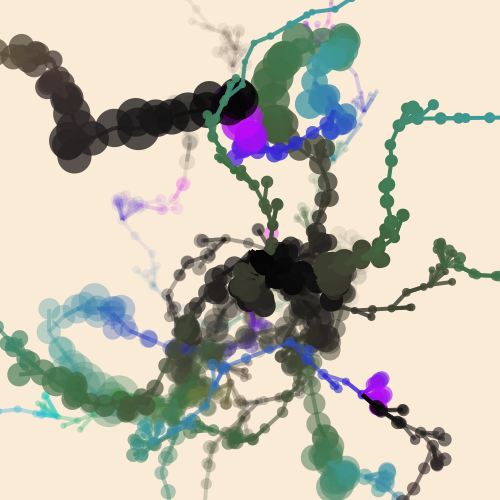

In [28]:
Drawing(500, 500, "blobart.svg")
origin()
background("antiquewhite")
for i in 1:12
  setopacity(i/12)
  seed = Blob(Point(1, 1), Point(10, 10), colorant"grey1", 10)
  push!(todolist, seed)
  while !isempty(todolist)
     draw(pop!(todolist), todolist)
  end
end
finish()
preview()

Fortunately "art is in the eye of the beholder", so if you like these, that's great. And if you don't, you can start thinking of different ways to coax beautiful images from Julia code.

## Challenges

#### 1. Create more masterpieces!

Post your art online!

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*